CA1 Data Analysis and Visualization

I create a composite indicator to evaluate chess openings based on 3 index: effectiveness, popularity, and complexity. This indicator will integrate various metrics such as win rates, frequency of use to offer a comprehensive assessment of each opening.

I will use the following dataset: (Available at: https://www.kaggle.com/datasets/alexandrelemercier/all-chess-openings)

In [1138]:
import pandas as pd

df = pd.read_csv('archive/openings.csv')
print(df.head())

   Unnamed: 0                                            Opening Colour  \
0           0                 Alekhine Defense, Balogh Variation  white   
1           1               Alekhine Defense, Brooklyn Variation  black   
2           2               Alekhine Defense, Exchange Variation  white   
3           3                Alekhine Defense, Four Pawns Attack  white   
4           4  Alekhine Defense, Four Pawns Attack, Fianchett...  black   

   Num Games  ECO Last Played  Perf Rating  Avg Player  Player Win %  Draw %  \
0        692  B03  2018-06-22         2247        2225          40.8    24.3   
1        228  B02  2018-06-27         2145        2193          29.8    22.4   
2       6485  B03  2018-07-06         2244        2194          40.8    27.7   
3        881  B03  2018-06-20         2187        2130          39.7    23.2   
4        259  B03  2018-05-20         2122        2178          37.8    21.2   

   ...  move2b move3w move3b move4w move4b White_win% Black_win% Whi

1. Theoretical Framework: Chess Openings

In chess, the choice of opening can be a determining factor in a player's success. For this reason, the proposed composite index seeks to quantify the multiple facets of chess openings, by synthesizing data relating to various dimensions: effectiveness, popularity and complexity. The aim is to provide a tool that players of all levels can use to make informed decisions about their repertoire of openings, facilitating strategic preparation and decision-making.

The data selected comes from an extensive database of recorded games, covering a wide range of games, from amateur encounters to grandmaster confrontations. This comprehensive collection ensures that the index is representative of the entire chess-playing community. Drawing on quantifiable measures such as win and draw percentages, frequency of use and move sequences.

<b>Data select:</b>
<ul>
    <li>Num Game</li>
    <li>Perf Rating</li>
    <li>Avg Player Rating</li>
    <li>Player Win %</li>
    <li>Draw %</li>
    <li>Opponent Win %</li>
    <li>Number of moves</li>
</ul>

<ol>
<li>
Popularity indicator:
    <ul>
    <li>Num Games: How frequently the opening is used.</li>
    </ul>
</li>
<li>
Effectivness indicator:
    <ul>
    <li>Player Win % 
    <li>Draw %</li>
    <li>Opponent Win %</li> 
     =>Direct outcomes when the opening is used.
    </ul>
</li>
<li>
    Improvement indicator:
    <ul>
    <li>perf : delta between player Rating and his performance rating</li>
    </ul>
</li>
<li>
Complexity indicator:
    <ul>
    <li>Number of moves: The length and complexity of the opening moves can indicate strategic depth.</li>
    <li>Number of variations: The number of possible move sequences can reflect the complexity of the opening.</li>
    </ul>
</li>
</ol>

In [1139]:
# add a column to the dataframe
df['Num Moves'] = df['moves_list'].apply(lambda x: len(x.split()))

# # add the data last_played, a number of days since the last played game
# df['Last Played'] = df['Last Played'].apply(lambda x: (pd.to_datetime('today') - pd.to_datetime(x)).days)



In [1140]:
selected_variable = ['Opening', 'Colour', 'Num Games', 'Perf Rating', 'Avg Player', 'Player Win %', 'Draw %', 'Opponent Win %','Num Moves']

df = df[selected_variable]

# print(df.head())

# Split the 'Opening' column into 'Opening Name' and 'Variation' based on the first comma
df[['Opening Name', 'Variation']] = df['Opening'].str.split(',', n=1, expand=True)

# print(df.sample(5))

# Strip any leading or trailing whitespace characters that may have appeared from the split
df['Opening Name'] = df['Opening Name'].str.strip()
df['Variation'] = df['Variation'].str.strip()

# Group by 'Opening Name' and aggregate the data
# For numeric columns like 'Num Games', 'Perf Rating', etc., you can sum or average them
# Count the number of variations for each opening
aggregated_data = df.groupby('Opening Name').agg({
    'Num Games': 'sum',
    'Perf Rating': 'mean',
    'Avg Player': 'mean',
    'Player Win %': 'mean',
    'Draw %': 'mean',
    'Opponent Win %': 'mean',
    'Num Moves': 'mean',
    'Variation': 'count'  # Counts the number of variations
}).rename(columns={'Variation': 'Num Variations', 'Num Moves': 'Avg Num Moves'})

# If number of variations is 0, set it to 1
aggregated_data['Num Variations'] = aggregated_data['Num Variations'].apply(lambda x: x if x > 0 else 1)

# calculate the delta variation betwenn the Avg Player and the Perf Rating
aggregated_data['DeltaPerf'] = aggregated_data['Perf Rating'] - aggregated_data['Avg Player']

# Change the number of game to a pourcentage of the total number of games
# aggregated_data['Num Games'] = aggregated_data['Num Games'] / aggregated_data['Num Games'].sum() 

# Reset index to make 'Opening Name' a column again
aggregated_data.reset_index(inplace=True)

# Save the modified dataframe to a new CSV file or continue analysis
aggregated_data.to_csv('archive/modified_openings.csv', index=False)

print(aggregated_data.sample(5))
print(aggregated_data.info())

data = pd.read_csv('archive/modified_openings.csv')



           Opening Name  Num Games  Perf Rating   Avg Player  Player Win %  \
1     Anderssen Opening       1308  2124.000000  2126.000000     35.700000   
26    Gruenfeld Defense      55125  2320.477273  2313.113636     32.836364   
8   Bogo-Indian Defense      22797  2273.833333  2299.166667     28.400000   
42         Lion Defense       3430  2263.000000  2226.500000     45.250000   
27     Gunderam Defense        613  2084.000000  2171.000000     31.800000   

       Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  
1   25.600000       38.700000       1.000000               1  -2.000000  
26  35.329545       31.827273      12.931818              44   7.363636  
8   38.616667       32.983333       7.833333               6 -25.333333  
42  22.800000       31.950000       6.750000               4  36.500000  
27  21.900000       46.300000       4.000000               1 -87.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (tot

In [1141]:
# Check for missing values
print(data.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate:", data.duplicated().sum())

Opening Name      0
Num Games         0
Perf Rating       0
Avg Player        0
Player Win %      0
Draw %            0
Opponent Win %    0
Avg Num Moves     0
Num Variations    0
DeltaPerf         0
dtype: int64

Number of duplicate: 0


In [1142]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalize the data

# Assuming df is your DataFrame and 'Num Games' is your column of interest
data['Log Num Games'] = np.log1p(data['Num Games'])  # log1p function handles zero values by log(1+x)

# List of columns to normalize
columns_to_normalize = ['Perf Rating', 'Player Win %', 'Log Num Games','Avg Player' , 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf']

# Apply Min-Max scaling
# for column in columns_to_normalize:
    # data[column + ' (Normalized)'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())

# Apply Standard scaling
scaler = StandardScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Show the head of the DataFrame to verify normalization
print(data.head())


# Reverse the Opponent Win % normalization because a lower opponent win rate is better for the opening
data['Opponent Win %'] = 1 - data['Opponent Win %']

# Reverse the Num Moves normalization because a lower number of moves is better
data['Avg Num Moves'] = 1 - data['Avg Num Moves']

# Reverse the Num Variations normalization because a lower number of variations is better
data['Num Variations'] = 1 - data['Num Variations']

print(data.sample(5))

# Save the normalized DataFrame to a new CSV file
data.to_csv('archive/normalized_data.csv', index=False)

# In normalized_data, remove the columns that are not normalized
data = pd.read_csv('archive/normalized_data.csv')

        Opening Name  Num Games  Perf Rating  Avg Player  Player Win %  \
0   Alekhine Defense      34710     0.173147    0.119049      0.138871   
1  Anderssen Opening       1308    -0.651590   -0.717208      0.042620   
2       Benko Gambit      24543     0.538050    0.330533      1.027777   
3     Benoni Defense      56840     0.719271    0.702851      0.509623   
4       Bird Opening      16315    -1.054496   -1.055993      0.673434   

     Draw %  Opponent Win %  Avg Num Moves  Num Variations  DeltaPerf  \
0 -0.139535        0.028863       0.318673        0.188209   0.216273   
1 -0.347081        0.312824      -1.618484       -0.533010   0.161808   
2 -0.421481       -0.392053       1.183168       -0.089183   0.814904   
3 -0.243438       -0.158685       1.427668        0.548818   0.143427   
4 -0.796786        0.263700      -0.800333       -0.422053  -0.117595   

   Log Num Games  
0       0.764676  
1      -0.889876  
2       0.589726  
3       1.013632  
4       0.383615  
  

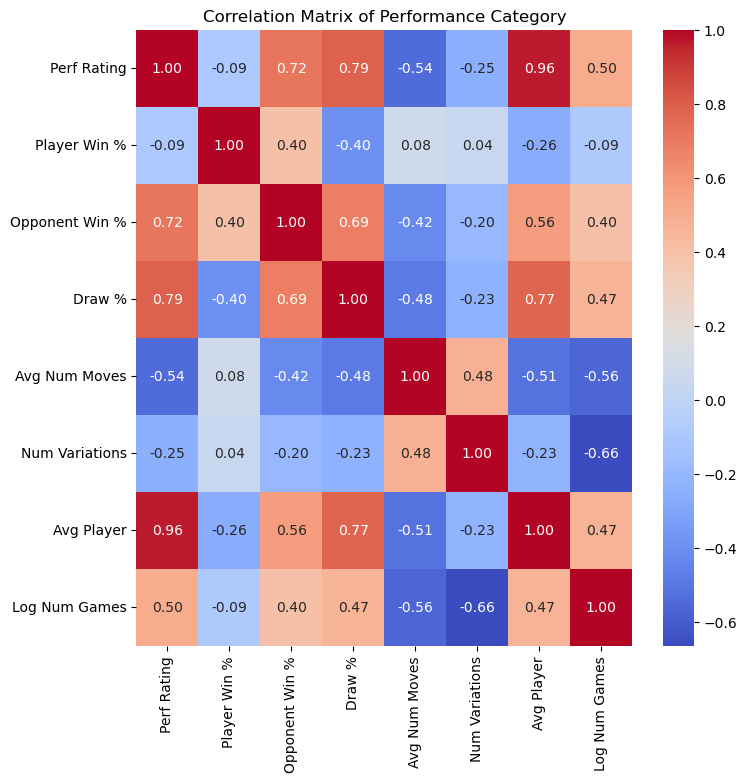

In [1143]:
# scatter plot on the variables from the performance category

import seaborn as sns
import matplotlib.pyplot as plt

# Select the normalized columns
normalizes_data = data[['Perf Rating', 'Player Win %', 'Opponent Win %', 'Draw %', 'Avg Num Moves', 'Num Variations', 'Avg Player', 'Log Num Games']]

# Calculate the correlation matrix
corr_matrix = normalizes_data.corr()

# Plot the heatmap
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Performance Category')
plt.show()




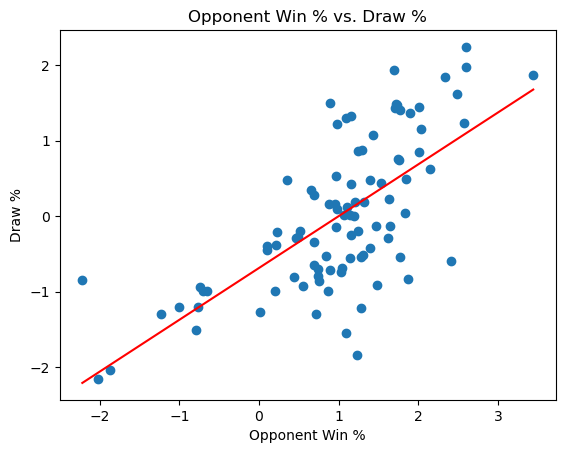

In [1144]:
import numpy as np

plt.title("Opponent Win % vs. Draw %")
plt.xlabel("Opponent Win %")
plt.ylabel("Draw %")
plt.scatter(data['Opponent Win %'], data['Draw %'])
plt.plot(np.unique(data['Opponent Win %']), np.poly1d(np.polyfit(data['Opponent Win %'], data['Draw %'], 1))(np.unique(data['Opponent Win %'])), color='red')


In [1145]:
from scipy.stats import pearsonr

corr = pearsonr(data['Opponent Win %'], data['Draw %'])
print(corr)

PearsonRResult(statistic=0.6870656552223079, pvalue=2.862711958416631e-14)


In [1146]:
coor = pearsonr(data['DeltaPerf'], data['Draw %'])
print(coor)


PearsonRResult(statistic=0.1564169957545693, pvalue=0.1343250139791142)


PearsonRResult(statistic=-0.3951954774109885, pvalue=8.839289257710953e-05)


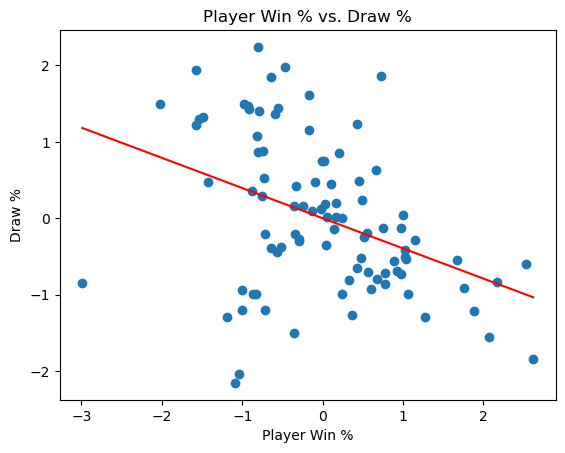

In [1147]:
plt.title("Player Win % vs. Draw %")
plt.xlabel("Player Win %")
plt.ylabel("Draw %")
plt.scatter(data['Player Win %'], data['Draw %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Draw %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Draw %'])
print(coor)

PearsonRResult(statistic=0.3959111291832093, pvalue=8.559628397478799e-05)


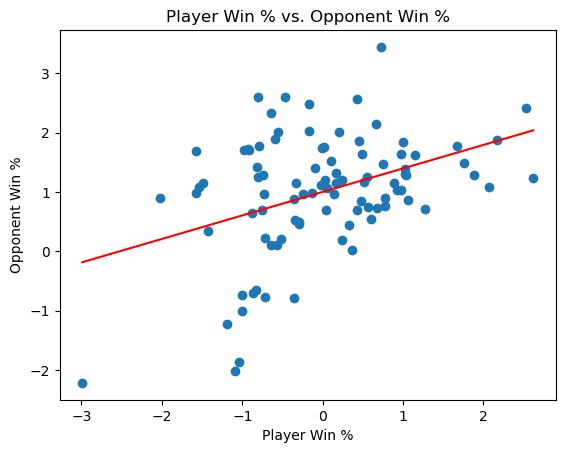

In [1148]:
plt.title("Player Win % vs. Opponent Win %")
plt.xlabel("Player Win %")
plt.ylabel("Opponent Win %")
plt.scatter(data['Player Win %'], data['Opponent Win %'])
plt.plot(np.unique(data['Player Win %']), np.poly1d(np.polyfit(data['Player Win %'], data['Opponent Win %'], 1))(np.unique(data['Player Win %'])), color='red')

coor = pearsonr(data['Player Win %'], data['Opponent Win %'])
print(coor)

In [1149]:
import statsmodels.api as sm

model = sm.OLS(data['Player Win %'], sm.add_constant(data['Draw %']))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)


                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.84
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.84e-05
Time:                        11:50:30   Log-Likelihood:                -124.06
No. Observations:                  93   AIC:                             252.1
Df Residuals:                      91   BIC:                             257.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        8.08e-17      0.096   8.39e-16      1.0

In [1150]:
model = sm.OLS(data['Player Win %'], sm.add_constant(data['Opponent Win %']))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.92
Date:                Sun, 05 May 2024   Prob (F-statistic):           8.56e-05
Time:                        11:50:30   Log-Likelihood:                -124.03
No. Observations:                  93   AIC:                             252.1
Df Residuals:                      91   BIC:                             257.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3959      0.136     -2.

In [1151]:
# multiple regression analysis

model = sm.OLS(data['Player Win %'], sm.add_constant(data[['Draw %', 'Opponent Win %']]))
result = model.fit()
print(result.summary())
# Line below is for the standard error
print(result.scale**0.5)

                            OLS Regression Results                            
Dep. Variable:           Player Win %   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.488e+06
Date:                Sun, 05 May 2024   Prob (F-statistic):          4.28e-204
Time:                        11:50:30   Log-Likelihood:                 351.92
No. Observations:                  93   AIC:                            -697.8
Df Residuals:                      90   BIC:                            -690.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.2642      0.001  -1281.

PearsonRResult(statistic=0.48402076184399767, pvalue=8.861654387954481e-07)


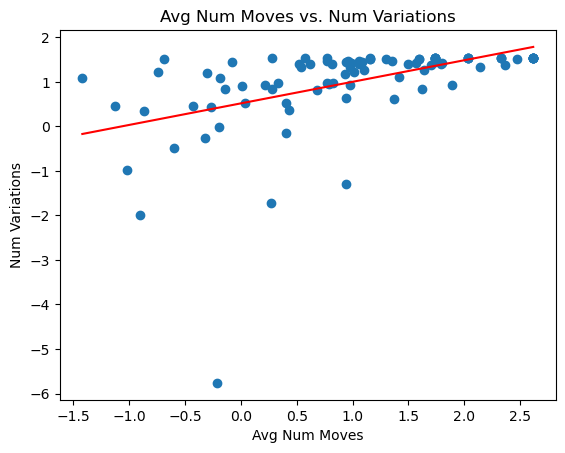

In [1152]:
plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

coor = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(coor)

PearsonRResult(statistic=0.5608883949384598, pvalue=6.061663410981866e-09)


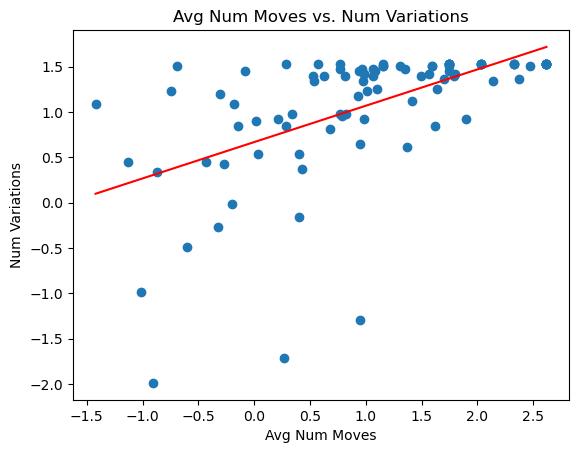

In [1153]:
# Remove outlier data points
data = data[(data['Avg Num Moves'] > -4) & (data['Num Variations'] > -4)]

# Calculate the correlation between 'Avg Num Moves' and 'Num Variations'
corr = pearsonr(data['Avg Num Moves'], data['Num Variations'])
print(corr)

plt.title("Avg Num Moves vs. Num Variations")
plt.xlabel("Avg Num Moves")
plt.ylabel("Num Variations")
plt.scatter(data['Avg Num Moves'], data['Num Variations'])
plt.plot(np.unique(data['Avg Num Moves']), np.poly1d(np.polyfit(data['Avg Num Moves'], data['Num Variations'], 1))(np.unique(data['Avg Num Moves'])), color='red')

In [1154]:
# Avg Num Moves and Num Variations are not higly correlated and the p-value is very significant, we will use this two variable to create a sub-indicator "Complexity"

# Calculate the complexity of the opening
weight = 0.5
data['Complexity'] = weight * data['Avg Num Moves'] + weight * data['Num Variations']

In [1155]:
# Calculate the Effectivness indicator of the opening
weight = {'Player Win %': 0.4, 'Opponent Win %': 0.15, 'Draw %': 0.15, 'DeltaPerf': 0.3}
data['Effectivness'] = 0
for column in weight.keys():
    data['Effectivness'] += weight[column] * data[column]

In [1156]:
# Add the popularity index
data['Popularity'] = data['Log Num Games']

# Add Improvement Index
data['Improvement'] = data['DeltaPerf']

In [1157]:
#drop the columns that are not needed
data.drop(columns=['Num Games', 'Perf Rating', 'Player Win %', 'Draw %', 'Opponent Win %', 'Avg Num Moves', 'Num Variations', 'DeltaPerf', 'Avg Player', 'Log Num Games'], inplace=True)

# save The Three indicators to a new CSV file
data.to_csv('archive/indicators.csv', index=False)

Text(0.5, 1.0, 'Correlation Matrix of the Three Indicators')

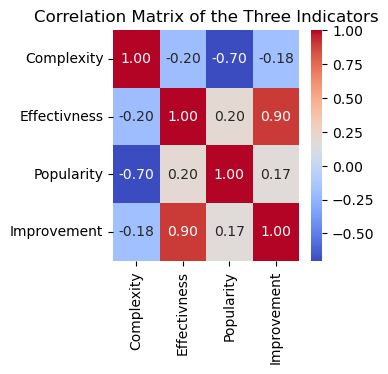

In [1158]:
# Now Make a new multivariate analysis with the three indicators

data = pd.read_csv('archive/indicators.csv')

# Select the columns for the multivariate analysis
multivariate_data = data[['Complexity', 'Effectivness', 'Popularity', 'Improvement']]

# Calculate the correlation matrix
corr_matrix = multivariate_data.corr()

# Plot the heatmap
plt.figure(figsize=(3,3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of the Three Indicators')






PearsonRResult(statistic=-0.20175791219061293, pvalue=0.053778337534092974)


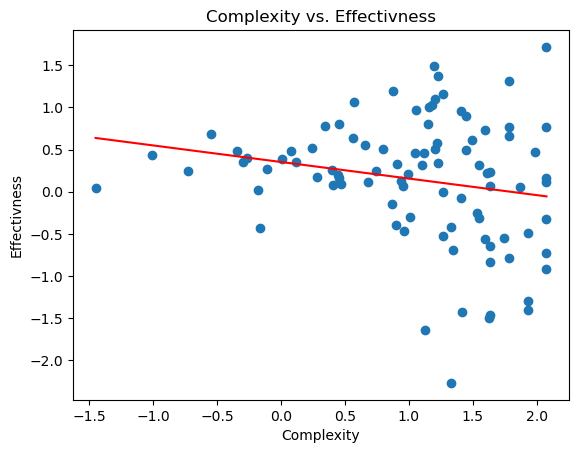

In [1159]:
plt.title("Complexity vs. Effectivness")
plt.xlabel("Complexity")
plt.ylabel("Effectivness")
plt.scatter(data['Complexity'], data['Effectivness'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Effectivness'], 1))(np.unique(data['Complexity'])), color='red') 

# Calculate the correlation between 'Complexity' and 'Effectivness'
corr = pearsonr(data['Complexity'], data['Effectivness'])
print(corr)

PearsonRResult(statistic=-0.7020655970241304, pvalue=6.336750483759291e-15)


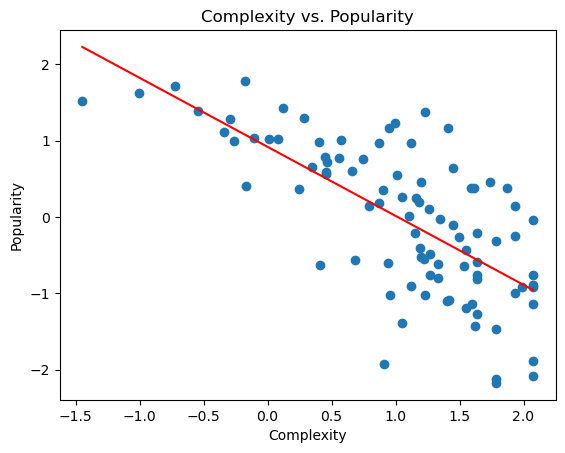

In [1160]:
plt.title("Complexity vs. Popularity")
plt.xlabel("Complexity")
plt.ylabel("Popularity")
plt.scatter(data['Complexity'], data['Popularity'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Popularity'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Popularity'
corr = pearsonr(data['Complexity'], data['Popularity'])
print(corr)

PearsonRResult(statistic=-0.17691627925356307, pvalue=0.09159267868355715)


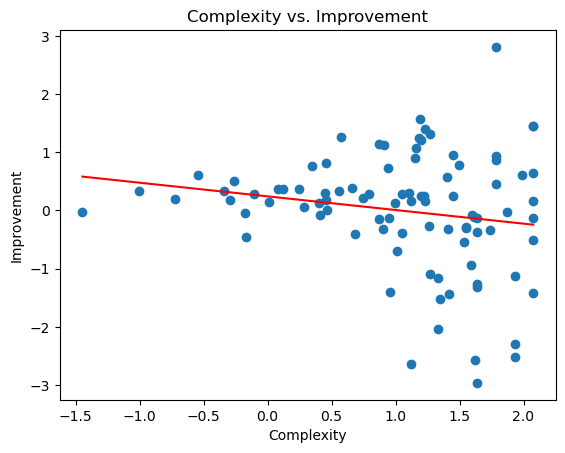

In [1161]:
plt.title("Complexity vs. Improvement")
plt.xlabel("Complexity")
plt.ylabel("Improvement")
plt.scatter(data['Complexity'], data['Improvement'])
plt.plot(np.unique(data['Complexity']), np.poly1d(np.polyfit(data['Complexity'], data['Improvement'], 1))(np.unique(data['Complexity'])), color='red')

# Calculate the correlation between 'Complexity' and 'Improvement'
corr = pearsonr(data['Complexity'], data['Improvement'])
print(corr)

PearsonRResult(statistic=0.2004611044825926, pvalue=0.05536985567975011)


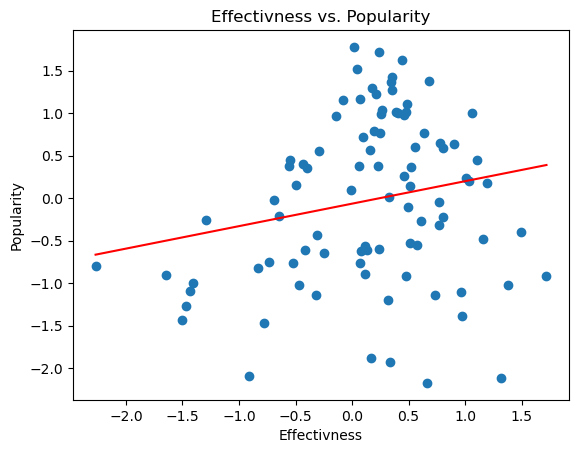

In [1162]:
plt.title("Effectivness vs. Popularity")
plt.xlabel("Effectivness")
plt.ylabel("Popularity")
plt.scatter(data['Effectivness'], data['Popularity'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Popularity'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Popularity'
corr = pearsonr(data['Effectivness'], data['Popularity'])
print(corr)

PearsonRResult(statistic=0.8954475136641447, pvalue=2.17514854343721e-33)


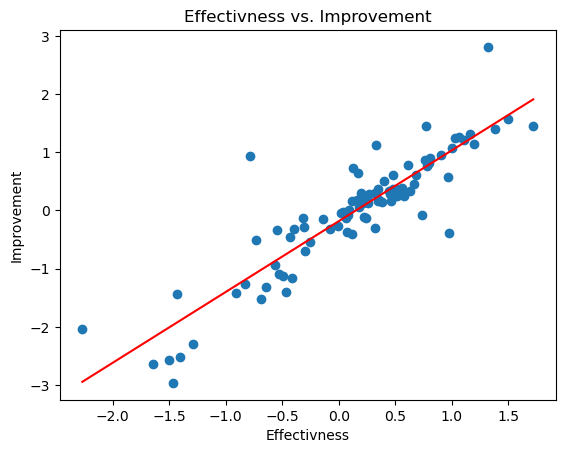

In [1163]:
plt.title("Effectivness vs. Improvement")
plt.xlabel("Effectivness")
plt.ylabel("Improvement")
plt.scatter(data['Effectivness'], data['Improvement'])
plt.plot(np.unique(data['Effectivness']), np.poly1d(np.polyfit(data['Effectivness'], data['Improvement'], 1))(np.unique(data['Effectivness'])), color='red')

# Calculate the correlation between 'Effectivness' and 'Improvement'
corr = pearsonr(data['Effectivness'], data['Improvement'])
print(corr)

In [1164]:
# Remove improvement

data.drop(columns=['Improvement'], inplace=True)

# Create the Overall index
weight = {'Complexity': 0.1, 'Effectivness': 0.5, 'Popularity': 0.4}

data['Overall'] = 0
for column in weight.keys():
    data['Overall'] += weight[column] * data[column]

# Save the final data to a new CSV file
data.to_csv('archive/final_data.csv', index=False)

# Display the 5 best openings based on the Overall index
print(data.sort_values(by='Overall', ascending=False).head(5))


               Opening Name  Complexity  Effectivness  Popularity   Overall
58             Pirc Defense    0.570068      1.064208    1.002517  0.990118
85             Torre Attack    1.202117      1.106422    0.453749  0.854923
86        Trompowsky Attack    1.446355      0.904294    0.637698  0.851862
30              Indian Game    1.228901      0.341802    1.367378  0.840742
67  Queen's Gambit Declined   -0.545790      0.681143    1.380994  0.838390
